# Assignment 02
__Please submit the Jupyter notebook (.ipynb file). File name should be "Lastname_Firstname_assignment01.ipynb". Provide step-by-step codes for grading and do not forget to run all your code before submitting.__

* Please do not share works publicly on GitHub or other places until the deadline.
* Do not forget that all the operations should be executed inside this notebook, you must not use external software (like Excel).
* Most (if not all) the questions are solved using a few lines of code. If you are writing more than 10 lines in one question, probably the answer is not correct.
* Some parts of coding can be identical if you work with your classmates but annotation/comment must be individual.
* If you use code from external sources, you must cite the source.
* If you have any concerns or struggles, do not hesitate to send an email
* To write comments use the `#` at the beginning of the line.

# 1. Answer the questions:

a) Which is the difference between using $y$ vs. $ŷ$?

b) Which is the relationship between the covariance and the correlation metrics?

c) If a model has a $R^2$ of 0.80, which is the interpretation?

d) What metrics you would use to evaluate regression model performance?

In [1]:
# 𝑦 represents the actual of a Input variable, but y^ means the predicted value of that variable based on a model that estimated. Which measn 𝑦 is the true value, and y^ is a prediction of that value.

In [ ]:
# Commom: Covariance and correlation are both measures of the linear relationship between two variables  Difference: they have different scale and interpretation. Covariance depends on the scales of the two variables, which means it is not suitable for comparsion across different scales datasets.positive covariance indicates that as one variable increases, the other variable also tends to increase, and vice versa. However, Correlation is a standardized measure of the linear relationship between two variables, which means it is not affected by the scale of the variables.

In [ ]:
# 𝑅^2 is an importante index to evaluation the model, which is calculated as the ratio of the explained variance to the total variance of the dependent variable.It range from 0 to 1, If R^2 equals to 0.8, indicating a great fit of the model to the data

In [ ]:
# 1. Mean Squared Error (MSE) 2.Root Mean Squared Error (RMSE) 3.R^2 4.Objective

# 2. Regression cleaning and modeling
You will train regression models to predict the market value of buildings provided by the NYC Department of Finance (DOF): Property Valuation and Assessment Data in https://data.cityofnewyork.us/resource/yjxr-fw8i. You can find the metadata in the website for interpretation.

The objective is to estimate the variable "Market Value" or `fullval`. For this reason, the following columns should not be used in the modeling: `['avland','avtot', 'exland', 'extot','avland2', 'avtot2', 'exland2', 'extot2']`

**Important**

Remember that this is an iterative implementation, so try to perfom this process at least twice selecting different variables. You can either comment your old code with `#` or just describe the process in the last question.

However, do not feel dissapointed if your regression metrics are not high, the objective of this assignment is to present you a real-world dataset and introduce you to the modeling process. For this assignment, the grading will not depend on how "high" is the evaluation metric of your model.




### (1) Load the dataset

You can use the export feature in the main website or just copy the URL from the API: https://data.cityofnewyork.us/resource/yjxr-fw8i.csv

In [163]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from math import sqrt
from regressors import stats
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder


import matplotlib.pyplot as plt

In [164]:
df = pd.read_csv('https://data.cityofnewyork.us/resource/yjxr-fw8i.csv')
df.head(20)

,bble,boro,block,lot,easement,owner,bldgcl,taxclass,ltfront,ltdepth,...,valtype,borough,latitude,longitude,community_board,council_district,census_tract,bin,nta,geocoded_column
0,1000163859,1,16,3859,NaN,"CHEN, QI TOM",R4,2,0,0,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000730028,1,73,28,NaN,NYC DSBS,V1,4,183,52,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000730029,1,73,29,NaN,NYC DSBS,Y7,4,90,500,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000297504,1,29,7504,NaN,NaN,R0,2,36,73,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000360012,1,36,12,NaN,NYC DSBS,Y7,4,534,604,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1000730008,1,73,8,NaN,NYC DSBS,T2,4,238,597,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1001749031,1,174,9031,NaN,NaN,V1,4,54,165,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1001760118,1,176,118,NaN,NaN,V1,4,0,50,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1001980001E,1,198,1,E,NYC TRANSIT,U7,3,0,0,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1002070001E,1,207,1,E,NYC TRANSIT,U7,3,0,0,...,AC-TR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### (2) Implement a brief exploratory data analysis

You can use this space to describe overall patterns of your data as well as identifying outliers.

In [165]:
df.describe().round(2)

,boro,block,lot,ltfront,ltdepth,stories,fullval,avland,avtot,exland,...,avtot2,exland2,extot2,excd2,latitude,longitude,community_board,council_district,census_tract,bin
count,1000.00,1000.00,1000.00,1000.00,1000.00,97.00,1.000000e+03,1000.00,1000.00,1000.00,...,319.00,126.00,127.00,0.0,29.00,29.00,29.00,29.00,29.00,29.00
mean,2.04,2914.40,574.92,72.32,104.09,6.04,8.436607e+05,248775.69,338066.59,209181.13,...,960832.92,1582910.74,2027224.65,NaN,40.75,-73.96,176.07,13.03,2226.28,1835375.45
std,0.66,1655.36,1819.18,233.32,182.44,6.68,7.731899e+06,2473642.67,3478609.55,2466549.47,...,5718503.56,6696453.33,8910340.30,NaN,0.05,0.04,87.02,13.48,8782.15,983793.97
min,1.00,16.00,1.00,0.00,0.00,1.00,0.000000e+00,0.00,0.00,0.00,...,7.00,159.00,159.00,NaN,40.66,-74.01,102.00,1.00,18.00,1000000.00
25%,2.00,1668.50,22.00,12.00,42.75,1.00,1.000000e+03,52.00,52.00,0.00,...,31086.00,6696.00,15879.00,NaN,40.72,-73.99,103.00,3.00,61.00,1026676.00
50%,2.00,2733.00,50.00,25.00,98.00,4.00,9.700000e+04,3180.50,3550.00,0.00,...,72540.00,63900.00,126990.00,NaN,40.73,-73.97,107.00,6.00,133.00,1088559.00
75%,2.00,4433.75,134.00,50.00,100.00,8.00,2.150000e+05,25200.00,36000.00,0.00,...,212983.00,429142.50,455040.00,NaN,40.79,-73.94,301.00,33.00,507.00,3059564.00
max,3.00,5949.00,9139.00,4000.00,4500.00,31.00,2.113370e+08,68994000.00,95101650.00,68994000.00,...,89720994.00,68994000.00,89720994.00,NaN,40.88,-73.83,307.00,38.00,46202.00,3425535.00


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   bble              1000 non-null   object 
 1   boro              1000 non-null   int64  
 2   block             1000 non-null   int64  
 3   lot               1000 non-null   int64  
 4   easement          98 non-null     object 
 5   owner             926 non-null    object 
 6   bldgcl            1000 non-null   object 
 7   taxclass          1000 non-null   object 
 8   ltfront           1000 non-null   int64  
 9   ltdepth           1000 non-null   int64  
 10  ext               4 non-null      object 
 11  stories           97 non-null     float64
 12  fullval           1000 non-null   int64  
 13  avland            1000 non-null   int64  
 14  avtot             1000 non-null   int64  
 15  exland            1000 non-null   int64  
 16  extot             1000 non-null   int64  
 

<AxesSubplot:>

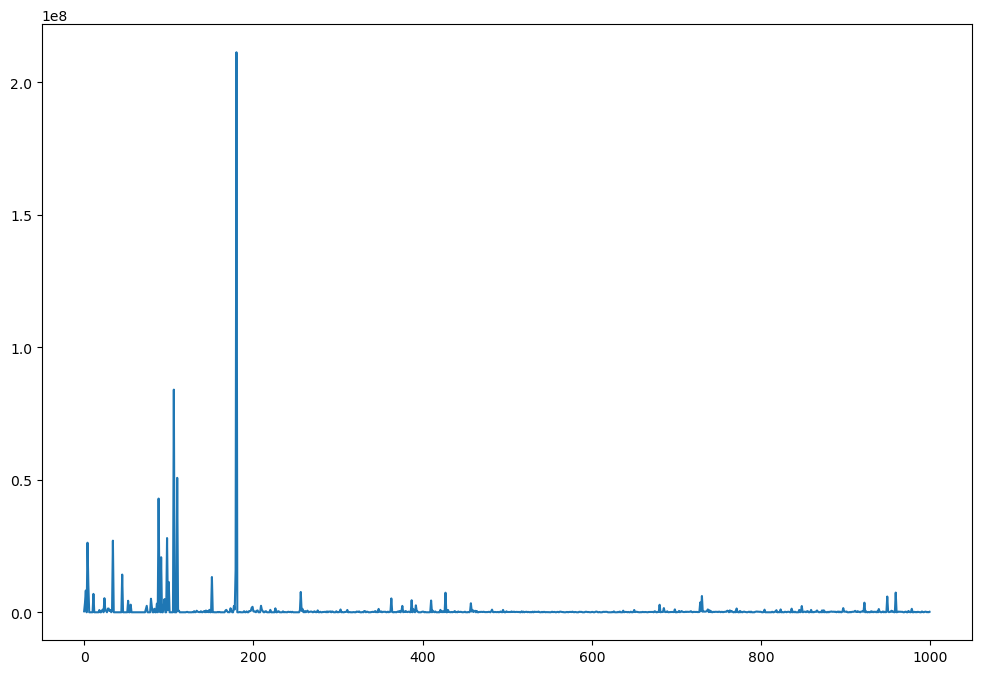

In [167]:
df['fullval'].plot(figsize=(12,8))


### (3) Perform the cleaning and pre-processing

Before starting the modeling tasks, you need to clean your dataset which includes manipulating those null values and reduce the dataframe to the essential columns. You can either drop rows, fill with zeros or other techniques you consider necessary.

In this task you can drop the following columns:
`['avland','avtot', 'exland', 'extot','avland2', 'avtot2', 'exland2', 'extot2']`

In [168]:
# decline the unnessary columns
df = df.drop(['avland','avtot', 'exland', 'extot','avland2', 'avtot2', 'exland2', 'extot2'], axis=1)
df.columns

Index(['bble', 'boro', 'block', 'lot', 'easement', 'owner', 'bldgcl',
       'taxclass', 'ltfront', 'ltdepth', 'ext', 'stories', 'fullval', 'excd1',
       'staddr', 'zip', 'exmptcl', 'bldfront', 'blddepth', 'excd2', 'period',
       'year', 'valtype', 'borough', 'latitude', 'longitude',
       'community_board', 'council_district', 'census_tract', 'bin', 'nta',
       'geocoded_column'],
      dtype='object')

In [169]:
cols_to_drop = df.select_dtypes(include=['object', 'category', 'bool', 'datetime', 'timedelta', 'object']).columns
df = df.drop(cols_to_drop, axis=1)


In [170]:
df.head(4)

,boro,block,lot,ltfront,ltdepth,stories,fullval,excd1,zip,bldfront,blddepth,excd2,latitude,longitude,community_board,council_district,census_tract,bin
0,1,16,3859,0,0,31.0,354180,6800.0,NaN,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,73,28,183,52,NaN,3515000,2191.0,10038.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,73,29,90,500,1.0,8215000,2191.0,10038.0,90,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,29,7504,36,73,7.0,0,NaN,10004.0,36,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
#Check Nulls
df.isnull().sum()

boro                   0
block                  0
lot                    0
ltfront                0
ltdepth                0
stories              903
fullval                0
excd1                775
zip                  757
bldfront               0
blddepth               0
excd2               1000
latitude             971
longitude            971
community_board      971
council_district     971
census_tract         971
bin                  971
dtype: int64

In [173]:
#repalce all Null with 0 so that we can do ML
#copy curretn df in case we need optimize data again
df = df.replace(np.nan,0)
df.isnull().sum()
df = df.drop(df.loc[df['fullval'] == 0].index)
df = df.reset_index()
df_optmz = df.copy()

### (4) Define target variable ($y$) and predictors ($X$) and split data into training and test data
    Since we are predicting the market value, 'fullval' would be your target column. Feel free to use the columns you find more useful.

In [174]:
#To define the high corr value independent index, so that we can ingorne unimportant index
df.corr()

,index,boro,block,lot,ltfront,ltdepth,stories,fullval,excd1,zip,bldfront,blddepth,excd2,latitude,longitude,community_board,council_district,census_tract,bin
index,1.000000,0.872497,0.172328,0.009502,-0.114295,-0.117121,-0.126022,-0.145284,-0.282070,-0.102032,-0.091102,-0.131491,NaN,0.018638,-0.018765,0.034490,0.061243,0.013105,0.036076
boro,0.872497,1.000000,-0.119137,-0.124396,-0.151205,-0.139666,-0.140658,-0.162990,-0.232642,-0.054417,-0.079604,-0.121320,NaN,0.037462,-0.037593,0.048895,0.065045,-0.005150,0.050765
block,0.172328,-0.119137,1.000000,0.150243,-0.007413,-0.025917,-0.120156,-0.109992,-0.227350,-0.255741,-0.027105,-0.103347,NaN,-0.011065,0.011174,-0.015572,-0.021141,0.044335,-0.017748
lot,0.009502,-0.124396,0.150243,1.000000,-0.017621,-0.057883,0.518878,-0.017400,0.234056,0.126500,-0.027473,-0.034238,NaN,0.117047,-0.117281,0.131162,0.143273,-0.007801,0.136185
ltfront,-0.114295,-0.151205,-0.007413,-0.017621,1.000000,0.700545,-0.029179,0.704096,0.191247,0.078100,0.064863,0.112185,NaN,-0.017502,0.017517,-0.017961,-0.016880,-0.002338,-0.018144
ltdepth,-0.117121,-0.139666,-0.025917,-0.057883,0.700545,1.000000,-0.062086,0.865672,0.096335,0.037160,0.150748,0.252851,NaN,-0.027984,0.028022,-0.029948,-0.030404,-0.001790,-0.030590
stories,-0.126022,-0.140658,-0.120156,0.518878,-0.029179,-0.062086,1.000000,0.017277,0.406161,0.270802,0.137983,0.079147,NaN,0.094502,-0.094655,0.102754,0.106798,-0.004794,0.105489
fullval,-0.145284,-0.162990,-0.109992,-0.017400,0.704096,0.865672,0.017277,1.000000,0.113216,0.073358,0.183912,0.339047,NaN,-0.005374,0.005371,-0.005056,-0.003978,-0.003383,-0.005116
excd1,-0.282070,-0.232642,-0.227350,0.234056,0.191247,0.096335,0.406161,0.113216,1.000000,0.163554,0.018720,0.067979,NaN,0.013713,-0.013860,0.027002,0.048784,-0.018619,0.033049
zip,-0.102032,-0.054417,-0.255741,0.126500,0.078100,0.037160,0.270802,0.073358,0.163554,1.000000,0.162596,0.091303,NaN,0.156537,-0.156552,0.155019,0.136566,0.069213,0.153974


In [175]:
#define high corr value to as training dataset
# indept = ['boro','block','stories','ltfront','bldfront','ltdepth','excd1','blddepth','community_board']
indept = ['ltdepth','blddepth','bldfront','census_tract','ltfront','boro','excd1']
target= 'fullval'
X_train, X_test, y_train, y_test = train_test_split(df[indept], df[target], train_size = 0.75, random_state=0)

# 3. Create OLS model:
### (1) Show train and test results 
    Please use R-squared and Mean Squared Error (MSE) to evaluate your model

In [176]:
!pip install regressors

In [177]:
# create model and name
lr = LinearRegression().fit(X_train, y_train)

In [178]:
y_pred_train = lr.predict(X_train)

In [179]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [180]:
#R2
R2 = lr.score(X_train, y_train) 
R2 = lr.score(X_train, y_train) 
# MSE
MSE = mean_squared_error(y_train, y_pred_train)
# MAPE
MAPE = mean_absolute_percentage_error(y_train, y_pred_train)
print('R2 is ' + str(R2))
print('MSE is ' + str(MSE))
print('MAPE is ' + str(MAPE))

R2 is 0.8322281389993713
MSE is 15591592071162.191
MAPE is 746.4668209882487


In [181]:
#predict values and evaluate(test)

# If the result from the test dataset is reasonable, our traning model can be used to test data
# Predicting new data points (future data)

y_pred_test = lr.predict(X_test)

print (lr.score(X_test, y_test))
print (mean_squared_error(y_test, y_pred_test))

0.2291404847191142
19186964889795.605


### (2) Show regression coefficients

In [130]:
#The change in the value of dependent variable corresponding to the unit change in the independent variable.
print (df.columns.tolist()[:-1])
print (lr.coef_)
print (stats.coef_pval(lr, X_train, y_train))
print (lr.intercept_)

['boro', 'block', 'lot', 'ltfront', 'ltdepth', 'stories', 'fullval', 'excd1', 'zip', 'bldfront', 'blddepth', 'excd2', 'latitude', 'longitude', 'community_board', 'council_district', 'census_tract']
[ 3.14092861e+04  3.75712774e+04 -8.54525971e+03 -3.60143739e+00
  5.74259890e+03 -4.05513716e+05  1.22083407e+02]
[6.43590915e-06 0.00000000e+00 0.00000000e+00 1.37150418e-01
 9.68338098e-01 3.19744231e-14 1.07678488e-02 2.63062035e-01]
-2284161.4756817752


In [133]:
# Create pandas dataframe of results
result_ols = pd.DataFrame(columns=['Features', 'Coef', 'p-value'])
result_ols['Features'] = indept
result_ols['Coef'] = lr.coef_
result_ols['p-value'] = stats.coef_pval(lr, X_train, y_train)[1:]
result_ols.round(3)

,Features,Coef,p-value
0,ltdepth,31409.286,0.000
1,blddepth,37571.277,0.000
2,bldfront,-8545.260,0.137
3,census_tract,-3.601,0.968
4,ltfront,5742.599,0.000
5,boro,-405513.716,0.011
6,excd1,122.083,0.263


In [134]:
stats.summary(lr, X_train, y_train,indept)

Residuals:
          Min            1Q      Median          3Q          Max
-3.500703e+06 -1.329918e+06 122146.1599 779385.0253 1.618949e+08


Coefficients:
                  Estimate     Std. Error  t value   p value
_intercept   -2.284161e+06  502687.831625  -4.5439  0.000006
ltdepth       3.140929e+04     915.088502  34.3238  0.000000
blddepth      3.757128e+04    3659.880205  10.2657  0.000000
bldfront     -8.545260e+03    5742.469569  -1.4881  0.137150
census_tract -3.601437e+00      90.702596  -0.0397  0.968338
ltfront       5.742599e+03     741.789232   7.7416  0.000000
boro         -4.055137e+05  158617.832974  -2.5565  0.010768
excd1         1.220834e+02     109.000589   1.1200  0.263062
---
R-squared:  0.75740,    Adjusted R-squared:  0.75511
F-statistic: 330.92 on 7 features


### (3) Interpret your results and describe the process until you get this final model version

In [135]:
stats.summary(lr, X_train, y_train,indept)

Residuals:
          Min            1Q      Median          3Q          Max
-3.500703e+06 -1.329918e+06 122146.1599 779385.0253 1.618949e+08


Coefficients:
                  Estimate     Std. Error  t value   p value
_intercept   -2.284161e+06  502687.831625  -4.5439  0.000006
ltdepth       3.140929e+04     915.088502  34.3238  0.000000
blddepth      3.757128e+04    3659.880205  10.2657  0.000000
bldfront     -8.545260e+03    5742.469569  -1.4881  0.137150
census_tract -3.601437e+00      90.702596  -0.0397  0.968338
ltfront       5.742599e+03     741.789232   7.7416  0.000000
boro         -4.055137e+05  158617.832974  -2.5565  0.010768
excd1         1.220834e+02     109.000589   1.1200  0.263062
---
R-squared:  0.75740,    Adjusted R-squared:  0.75511
F-statistic: 330.92 on 7 features


#### 1 Optimize

In [ ]:
#From stats we can see the 'Itdepth' 'blddepth' 'ltfront' 'boro' show high corr with the target value

,level_0,index,boro,block,lot,ltfront,ltdepth,stories,fullval,excd1,zip,bldfront,blddepth,excd2,latitude,longitude,community_board,council_district,census_tract,bin
0,0,0,1,16,3859,0,0,31.0,354180,6800.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,73,28,183,52,0.0,3515000,2191.0,10038.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,2,1,73,29,90,500,1.0,8215000,2191.0,10038.0,90,258,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,4,1,36,12,534,604,0.0,26246000,2191.0,0.0,0,604,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5,1,73,8,238,597,1.0,10315000,2191.0,10038.0,0,557,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,779,993,3,2920,14,25,64,0.0,133000,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
780,780,994,3,2922,20,25,100,0.0,238000,2231.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
781,781,995,3,2926,13,29,102,0.0,172000,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
782,782,997,3,3010,10,25,100,0.0,137000,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [182]:
df_optmz.corr()

,index,boro,block,lot,ltfront,ltdepth,stories,fullval,excd1,zip,bldfront,blddepth,excd2,latitude,longitude,community_board,council_district,census_tract,bin
index,1.000000,0.872497,0.172328,0.009502,-0.114295,-0.117121,-0.126022,-0.145284,-0.282070,-0.102032,-0.091102,-0.131491,NaN,0.018638,-0.018765,0.034490,0.061243,0.013105,0.036076
boro,0.872497,1.000000,-0.119137,-0.124396,-0.151205,-0.139666,-0.140658,-0.162990,-0.232642,-0.054417,-0.079604,-0.121320,NaN,0.037462,-0.037593,0.048895,0.065045,-0.005150,0.050765
block,0.172328,-0.119137,1.000000,0.150243,-0.007413,-0.025917,-0.120156,-0.109992,-0.227350,-0.255741,-0.027105,-0.103347,NaN,-0.011065,0.011174,-0.015572,-0.021141,0.044335,-0.017748
lot,0.009502,-0.124396,0.150243,1.000000,-0.017621,-0.057883,0.518878,-0.017400,0.234056,0.126500,-0.027473,-0.034238,NaN,0.117047,-0.117281,0.131162,0.143273,-0.007801,0.136185
ltfront,-0.114295,-0.151205,-0.007413,-0.017621,1.000000,0.700545,-0.029179,0.704096,0.191247,0.078100,0.064863,0.112185,NaN,-0.017502,0.017517,-0.017961,-0.016880,-0.002338,-0.018144
ltdepth,-0.117121,-0.139666,-0.025917,-0.057883,0.700545,1.000000,-0.062086,0.865672,0.096335,0.037160,0.150748,0.252851,NaN,-0.027984,0.028022,-0.029948,-0.030404,-0.001790,-0.030590
stories,-0.126022,-0.140658,-0.120156,0.518878,-0.029179,-0.062086,1.000000,0.017277,0.406161,0.270802,0.137983,0.079147,NaN,0.094502,-0.094655,0.102754,0.106798,-0.004794,0.105489
fullval,-0.145284,-0.162990,-0.109992,-0.017400,0.704096,0.865672,0.017277,1.000000,0.113216,0.073358,0.183912,0.339047,NaN,-0.005374,0.005371,-0.005056,-0.003978,-0.003383,-0.005116
excd1,-0.282070,-0.232642,-0.227350,0.234056,0.191247,0.096335,0.406161,0.113216,1.000000,0.163554,0.018720,0.067979,NaN,0.013713,-0.013860,0.027002,0.048784,-0.018619,0.033049
zip,-0.102032,-0.054417,-0.255741,0.126500,0.078100,0.037160,0.270802,0.073358,0.163554,1.000000,0.162596,0.091303,NaN,0.156537,-0.156552,0.155019,0.136566,0.069213,0.153974


In [194]:
#From stats we can see the 'Itdepth' 'blddepth''ltfront' 'boro' show high corr with the target value
#So we only select them as indept value

indept1 = ['ltdepth','blddepth','ltfront', 'boro']
target1= 'fullval'
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_optmz[indept1], df_optmz[target1], train_size = 0.75, random_state=0)

In [203]:

# create model and name
lr1 = LinearRegression().fit(X_train1, y_train1)
y_pred_train1 = lr1.predict(X_train1)
lr1.score(X_train1, y_train1) 
# MSE
MSE = mean_squared_error(y_train1, y_pred_train1)
# MAPE
MAPE = mean_absolute_percentage_error(y_train1, y_pred_train1)
#R2
R2 = lr1.score(X_train1, y_train1) 
# MSE
MSE = mean_squared_error(y_train1, y_pred_train1)
# MAPE
MAPE = mean_absolute_percentage_error(y_train1, y_pred_train1)
print('R2 is ' + str(R2))
print('MSE is ' + str(MSE))
print('MAPE is ' + str(MAPE))

R2 is 0.8304328669934246
MSE is 16917512733017.742
MAPE is 357.4229447833636


In [204]:
y_pred_test1 = lr1.predict(X_test1)

print (lr1.score(X_test1, y_test1))
print (mean_squared_error(y_test1, y_pred_test1))

-2.6707145791078615
14744923806621.832


In [205]:
stats.summary(lr1, X_train1, y_train1, indept1)

Residuals:
          Min           1Q      Median          3Q          Max
-3.402546e+06 -856319.9355 301494.5623 797085.7799 1.806916e+08


Coefficients:
                Estimate     Std. Error  t value   p value
_intercept -2.559178e+06  587341.839161  -4.3572  0.000016
ltdepth     3.403131e+04     973.973971  34.9407  0.000000
blddepth    2.394738e+04    3145.188947   7.6140  0.000000
ltfront     7.597743e+03     883.564120   8.5990  0.000000
boro       -2.811227e+05  170737.845192  -1.6465  0.100193
---
R-squared:  0.83043,    Adjusted R-squared:  0.82927
F-statistic: 713.79 on 4 features


In [206]:
#This model perform worse than last time, print out all important index of this model
y_pred_train1 = lr1.predict(X_train1)
y_pred_test1 = lr1.predict(X_test1)

# Model performance (R-squared values of train and test sets)
print ("Training set score: %.2f"% lr1.score(X_train1, y_train1))
print ("Test set score: %.2f"% lr1.score(X_test1, y_test1))

# Model performance (MSE of train and test sets)
print('Mean squared error (train set): %.2f'% mean_squared_error(y_train1, y_pred_train1))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test1, y_pred_test1))

Training set score: 0.83
Test set score: -2.67
Mean squared error (train set): 16917512733017.74
Mean squared error (test set): 14744923806621.83


In [210]:
#Print out the previous model, adjust some index to make this model better


# Split predictors and target variable
indept = ['ltdepth','blddepth','bldfront','census_tract','ltfront','boro','excd1']
target= 'fullval'

# Split train and test dataset, them change random_state so that can make Training set score and Test set score both
#higher than 0.5
X_train, X_test, y_train, y_test = train_test_split(df_optmz[indept], df_optmz[target], train_size = 0.75, random_state=10)

# Build OLS model
lr2 = LinearRegression().fit(X_train, y_train) # training process 

y_pred_train = lr2.predict(X_train)
y_pred_test = lr2.predict(X_test)

# Model performance (R-squared values of train and test sets)
print ("Training set score: %.2f"% lr2.score(X_train, y_train))
print ("Test set score: %.2f"% lr2.score(X_test, y_test))

# Model performance (MSE of train and test sets)
print('Mean squared error (train set): %.2f'% mean_squared_error(y_train, y_pred_train))
print('Mean squared error (test set): %.2f'% mean_squared_error(y_test, y_pred_test))



Training set score: 0.61
Test set score: 0.52
Mean squared error (train set): 9197805358409.03
Mean squared error (test set): 111804135105309.33
